In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier # Import random forest classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn import tree

In [3]:
validated_labels = pd.read_csv('data/processed-labels/test_set_seattle_4.csv')
# validated_labels = validated_labels[validated_labels['label_type'] == 'CurbRamp']

# validated_labels['heading_diff'] = validated_labels['heading_diff'].abs()
# validated_labels['pitch_diff'] = validated_labels['pitch_diff'].abs()
# validated_labels.fillna(0,  inplace=True)
# len(validated_labels)
#24984 rows -> 12117 rows Wrong, 12867 rows Correct

In [4]:
label_types = validated_labels ['label_type'].unique().tolist()
label_types

['CurbRamp',
 'SurfaceProblem',
 'Obstacle',
 'NoCurbRamp',
 'NoSidewalk',
 'Occlusion',
 'Other',
 'Crosswalk',
 'Signal']

In [5]:
print((validated_labels['verified']== 1).sum())

12867


In [6]:
feature_cols = ['count', 'severity', 'zoom', 'tag_list', 'distance', 'description']
# X = validated_labels[feature_cols] # Features
# y = validated_labels.verified # Target variable

In [42]:
X = validated_labels[feature_cols] # Features
y = validated_labels.verified # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=14) # 50% training and 50% test

# Decision Tree classifer
clf = RandomForestClassifier(criterion="gini", n_estimators= 3, max_depth=4, max_leaf_nodes = 12, class_weight = "balanced").fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy
print("Accuracy:",metrics.precision_score(y_test, y_pred))

Accuracy: 0.8513200555812876


In [73]:
summary = pd.DataFrame(columns=['label_type', 'Accuracy'])

for i in range(0,1):
    df_train = validated_labels[validated_labels['label_type'] == label_types[i]]
    X = df_train[feature_cols] # Features
    y = df_train.verified # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=14) # 50% training and 50% test

    # Decision Tree classifer
    clf = RandomForestClassifier(criterion="gini", n_estimators= 3, max_depth=3, max_leaf_nodes = 12, class_weight = "balanced").fit(X_train,y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)

    # summary = summary.append({'label_type': label_types[i], 'precision': metrics.precision_score(y_test, y_pred)}, ignore_index=True)
    summary = summary.append({'label_type': label_types[i], 'Accuracy': metrics.accuracy_score(y_test, y_pred)}, ignore_index=True)

/var/folders/zm/x5dzdlrs5mlbxrm7z5g6p05r0000gn/T/ipykernel_32409/4032511297.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary = summary.append({'label_type': label_types[i], 'Accuracy': metrics.accuracy_score(y_test, y_pred)}, ignore_index=True)


In [74]:
summary

,label_type,Accuracy
0,CurbRamp,0.63667


In [75]:
# Model Precision - tp / (tp + fp)
print("Precision:",metrics.precision_score(y_test, y_pred))

Precision: 0.9151989562948467


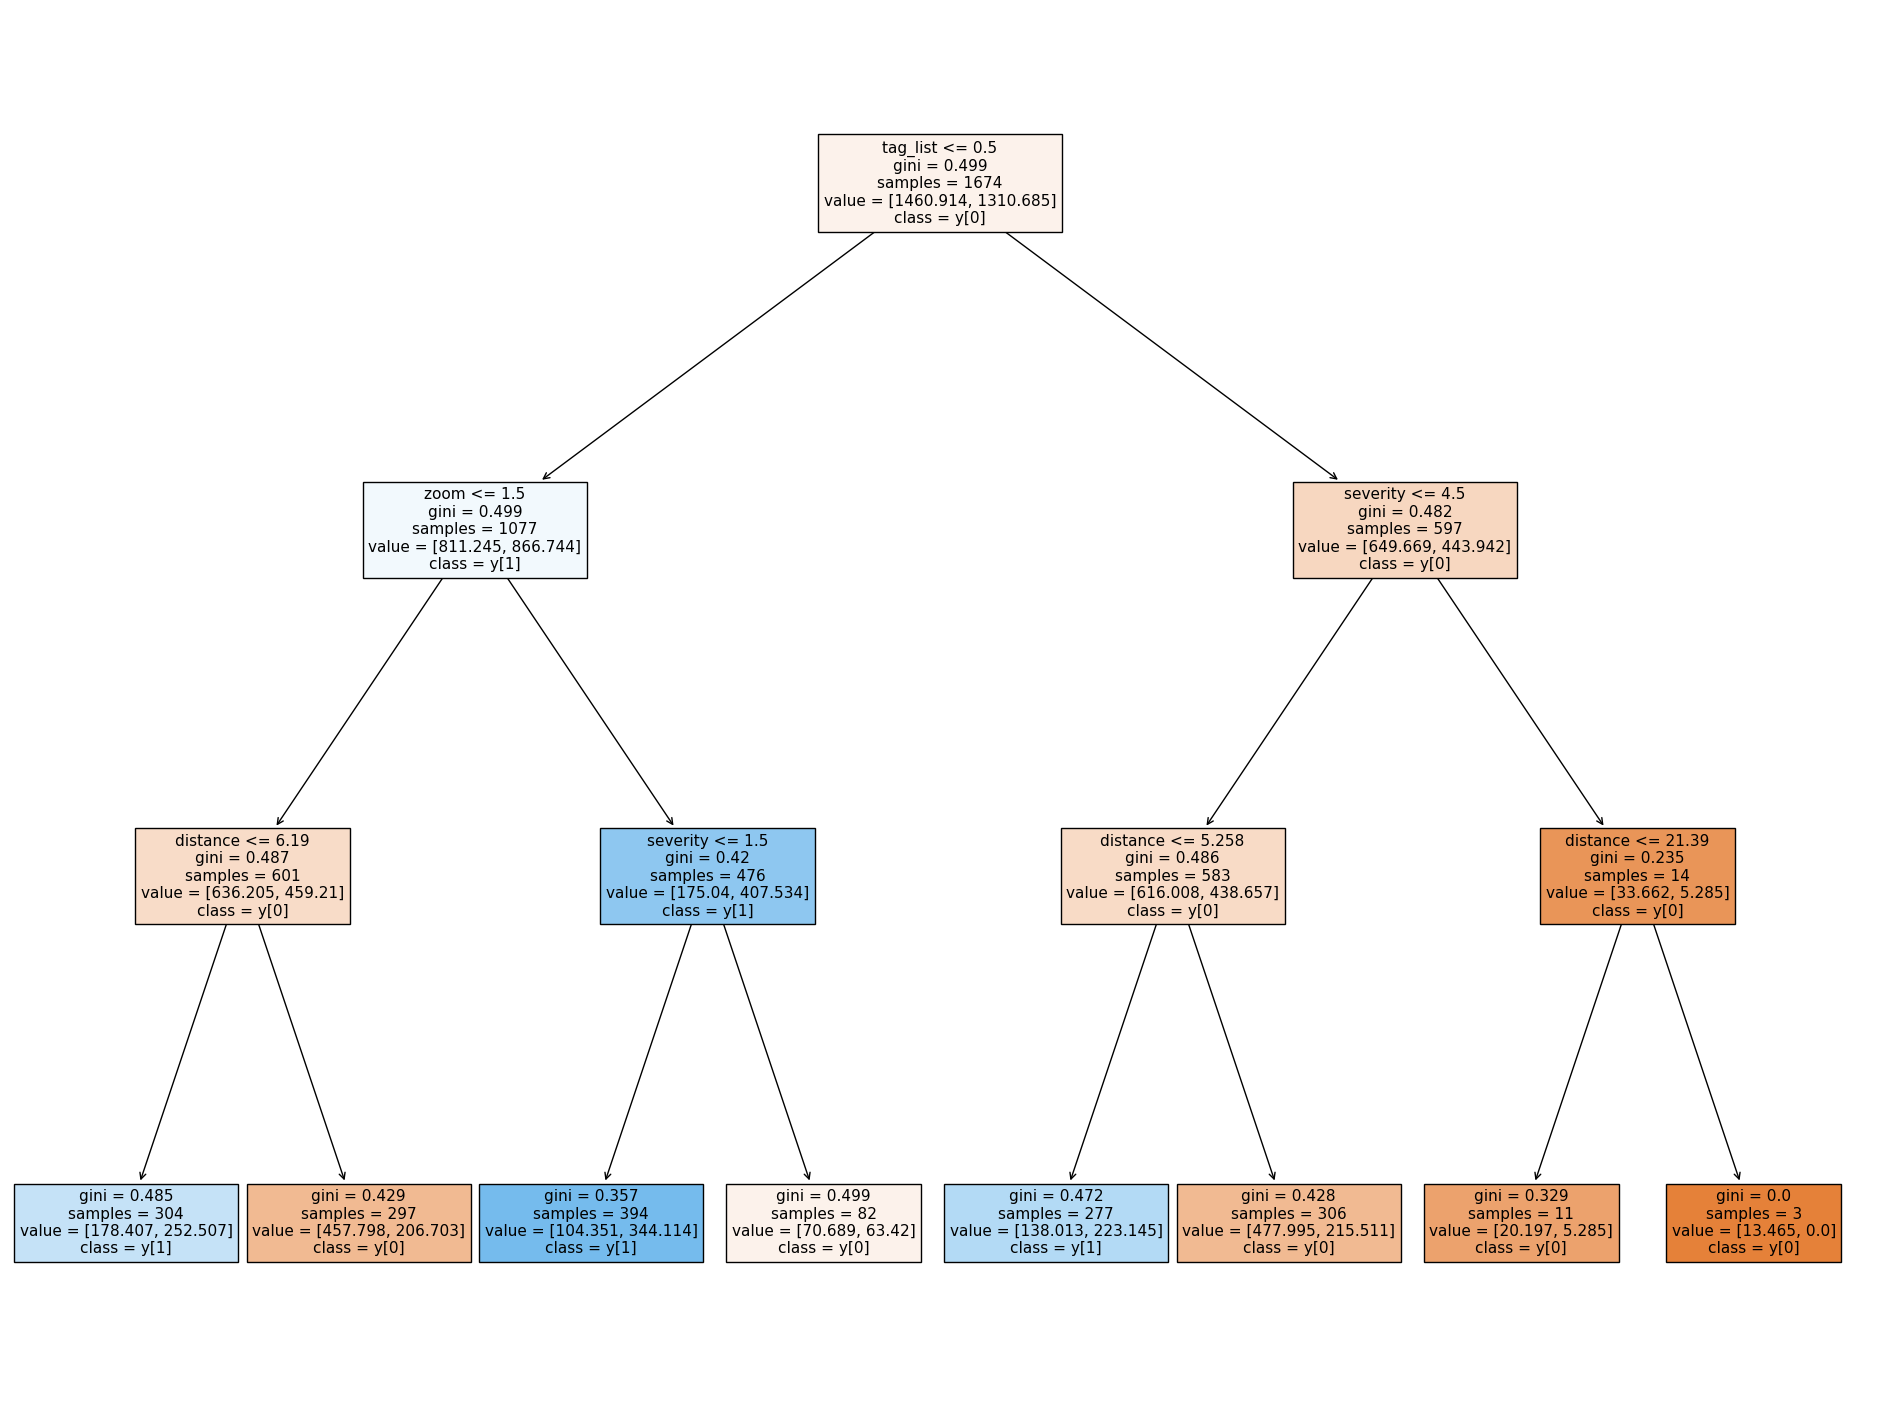

In [76]:
from sklearn import tree
fig = plt.figure(figsize=(24,18))

tree.plot_tree(clf[2], 
                feature_names=feature_cols,  
                class_names=True,
                filled=True,
                fontsize=11)

plt.savefig('tree_2.svg', format='svg')

In [31]:
dot_data = tree.export_graphviz(clf[1],
                                feature_names=feature_cols,
                                class_names=True,
                                out_file=None,
                                filled=True,
                                rounded=False)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ['#009392','#72aaa1','#b1c7b3','#f1eac8','#e5b9ad','#d98994','#d0587e']
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(3):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree.png')

IndexError: list index out of range

In [23]:
import pydotplus
import graphviz
from sklearn.datasets import load_iris
from sklearn import tree
import collections
clf = tree.DecisionTreeClassifier(random_state=42)
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf,
                                feature_names=iris.feature_names,
                                out_file=None,
                                filled=True,
                                rounded=False,
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('brown', 'forestgreen')
edges = collections.defaultdict(list)
for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))
for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])
graph.write_png('tree.png')

SyntaxError: invalid syntax (3111485902.py, line 14)

In [7]:
#show graph
graph = graphviz.Source(dot_data)
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

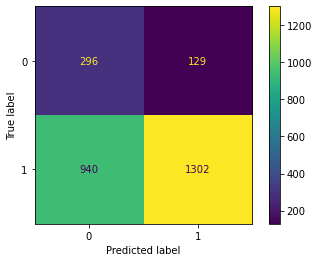

In [18]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                            display_labels=clf.classes_)
disp.plot()